# <center>Projet Analyse Numérique </center>
<span style='color:blue'>Réalisé par :</span> **Haythem MRAD** et **Chiraz GUESMI**   éleves ingénieur en 2éme année téléinformatique 
<BR><span style='color:blue'>Sous la supervision de :</span> **D. Khemais ABDALLAH**

---------------------------------------------------------------------------------------------------------------------------


<img src="isitcom.png" style="float: left; margin-right: 3px;" > 
<img src="universiteDeSousse.png" style="float: right; margin-right: 3px;" >


<h3>Objectif :</h3>
Le but de ce projet est d’implémenter sous Python différentes méthodes d’intégration numérique permettant
d’approcher la valeur de l’intégrale I(f) d’une fonction f(x) sur l’intervalle [a, b]:
<br> $$\int_a^b f(x) \,dx,$$ .
<h3> 1. Introduction </h3>
<br>Les méthodes étudiées ici sont des méthodes simples se basant sur l’interpolation de la fonction à intégrer f(x)
par un polynôme dont la primitive est connue. Quatre méthodes sont à l’étude, à savoir :
<br>
— la méthode du rectangle.
<br>
— la méthode du point fixe
<br>
— la méthode du trapèze.
<br>
— la méthode de Simpson.


<h3>2 Les méthodes d’intégration numérique</h3>

<h4>2.1 Méthode du rectangle et méthode du point fixe</h4>
Les méthodes du rectangle et du point fixe consistent à interpoler une fonction f(x) par un polynôme de degré
0 (c’est-à-dire une fonction constante, comme illustré sur les Figs. Un seul point d’interpolation ξ est
alors considéré et l’intégrale I(f) de la fonction f(x) peut s’écrire 1
:
<br><center>$$I(f) = (b − a)f(ξ)$$.</center>
<br>Deux cas sont considérés selon la position du point d’interpolation :
<br>— si ξ = a ou ξ = b, il s’agit de la méthode du rectangle  d’ordre 0,
<br>— si ξ = (a + b)/2, il s’agit de la méthode du point fixe  d’ordre 1.
<h4>2.2 Méthode du trapèze</h4>
La méthode du trapèze consiste à interpoler une fonction f(x) par un polynôme de degré 1 (c’est-à-dire une
droite, comme illustré sur la Fig. 1-d). Les deux points d’interpolation a et b (qui sont les valeurs extrémales du
domaine considéré) suffisent à définir le polynôme. L’intégrale I(f) de la fonction f(x) peut alors s’écrire :
<br><center>$$I(f) = (b − a)/((f(a) + f(b)))*2$$</center>
<br>Il s’agit d’une méthode d’ordre 1.


<h4> 2.3 Méthode de Simpson </h4>
La méthode de Simpson consiste à interpoler une fonction f(x) par un polynôme de degré 2 (voir Fig. 1-e).
Les trois points d’interpolation utilisés sont alors :
<br>les valeurs aux extrémités a et b.
<br>le point central (a + b)/2.
<br>L’intégrale I(f) de la fonction f(x) peut alors s’écrire :

<img src="trapez.PNG"   class="center" >

Il s’agit d’une méthode d’ordre 3.

<h3>3. Travail demandé</h3>

1. Créer des classes:
   - classe  rectangle
   - classe point mileu 
   - classe trapéze 
   - classe simpson   
chaque classe possedent des fonctions bien définie :
   <br> a) calcul d'integral 
    <br> b)affichage de graph 
    <br> c)calcul de taux d'erreur 
2. l'application peut repondre aux besoins d'utlisateur 
    en effet l'utlisateur saisir une fonction continue avec ses bornes inferieur et superieur 
    puis il tape le nombre d'echantillonnage 
    de meme il peut choisir une ou plusiers méthode parmi les 4 pour qu'on puisse detrminer la valeur de l'integrale de la fonction 
    choisie 
3. les interfaces sont lisibles et simple a utiliser 

In [37]:
from tkinter import *
from tkinter import messagebox
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [107]:
class Rectangle(object): #class rectange 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        n=self.n
        y=f
        sol = 0
        for i in range(n-1):
            sol = sol + y[i]*(x[i+1]-x[i])
        return sol
    
    
    def graph(self,f):
        x=self.x
        n=self.n
        y=f
        integrale = 0
        plt.plot(x,y,"bo-")
        for i in range(n-1):
            integrale = integrale + y[i]*(x[i+1]-x[i])
            # dessin du rectangle
            x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
            y_rect = [0 , y[i], y[i] ,0 , 0] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"r")
        print("integrale =", integrale)
        plt.show()

In [193]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel('f(x)')


In [202]:
class PointMilieu(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
    def erreur(a,b,n):
        e=((b-a)/(2**(n+1)))
        return e
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"bo")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.xlabel ( ' x ' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des milieu' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [206]:
class Simpson(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f
        h = float(x[1] - x[0])
        n=len(x)
        s= 0
        for i in range(0, n):
            Xi = self.a + (self.b - self.a) * i/float(n)
            Xj = self.a+ (self.b - self.a) * (i + 1)/float(self.n)
            s += (Xj - Xi) * (f(Xi) + 4.0*f((Xi + Xj)/2.0) + f(Xj))/6.0
            s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        aa=self.a
        bb=self.b
        m=(aa+bb)/2
        xlist_fine=np.linspace(self.a, self.b, resolution)
        xx=xlist_fine
        for i in range ( self.n ) :

            l0=(xx-bb)/(aa-bb)*(xx-m)/(aa-m)
            l1=(xx-aa)/(m-aa)*(xx-bb)/(m-bb) 
            l2= (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            p=f(aa)*l0+f(m)*l1+f(bb)*l2 #polynome
            plt.plot ( xx , p , 'b' ) 
            #plt.plot(m,f(m),"r")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,"g")#plot de f(x)
        plt.plot(xl, yl,'bo')#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Simpson' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\haythem\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-209-746f1b22522a>", line 101, in calcul_inter
    label3.grid(row=8, column=1)
NameError: name 'label3' is not defined


integrale = 59.000000000000014


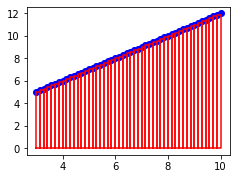

In [209]:
class interface:

    def __init__(self, window):
        self.window = window
#----------------------------------------------------

        varTitle = StringVar()
        varTitle.set("Intégration numérique")
        labelTitle = Label(window, textvariable=varTitle, height=2)
        labelTitle.grid(row=0, columnspan=3, sticky=S, padx=10)
#----------------------------------------------------

        varF = StringVar()
        varF.set("La fonction f(x) :")
        labelF = Label(window, textvariable=varF, height=2)
        labelF.grid(row=1, sticky=W, pady=10, padx=20)

        idF = StringVar()
        self.boxF = Entry(window, bd=4, width=40, textvariable=idF)
        self.boxF.grid(row=1, column=1, pady=10, padx=10)
#----------------------------------------------------

        varA = StringVar()
        varA.set("La borne inférieur, a :")
        labelA = Label(window, textvariable=varA, height=2)
        labelA.grid(row=2, sticky=W, pady=10, padx=20)

        idA = StringVar()
        self.boxA = Entry(window, bd=4, width=40, textvariable=idA)
        self.boxA.grid(row=2, column=1, pady=10, padx=10)
#----------------------------------------------------

        varB = StringVar()
        varB.set("La borne supérieur, b :")
        labelB = Label(window, textvariable=varB, height=2)
        labelB.grid(row=3, sticky=W, pady=10, padx=20)

        idB = StringVar()
        self.boxB = Entry(window, bd=4, width=40, textvariable=idB)
        self.boxB.grid(row=3, column=1, pady=10, padx=10)
#----------------------------------------------------

        varN = StringVar()
        varN.set("valeur de N :")
        labelN = Label(window, textvariable=varN, height=2)
        labelN.grid(row=4, sticky=W, pady=10, padx=20)

        idN = StringVar()
        self.boxN = Entry(window, bd=4, width=40, textvariable=idN)
        self.boxN.grid(row=4, column=1, pady=10, padx=10)

#----------------------------------------------------
        self.button1 = Button(window, text="  graphe  ", bg="#181828", command=self.graphe,fg="white",width=20)
        self.button1.grid(row=5, column=0, pady=20, padx=20)

        self.button2 = Button(window, text="  erreur   ", bg="#882828", fg="white",width=20)
        self.button2.grid(row=5, column=2, pady=20, padx=20)
        
        self.button3 = Button(window, text="  tableau   ", bg="#481828",command=self.calcul_inter, fg="white",width=20)
        self.button3.grid(row=5, column=1, pady=20, padx=20)
#----------------------------------------------------
       
    def graphe(self):
            n = int(self.boxN.get())
            a = float(self.boxA.get())
            b = float(self.boxB.get())
            x = np.linspace(a, b, n)
            F =eval (self.boxF.get())
            #f = lambda x: eval(F)
            Rec=Rectangle(a,b,n,F)
            trap=Trapezoidal(a,b,n,F)
            ptm=PointMilieu(a,b,n,F)
            simp=Simpson(a,b,n,F)
    #-----------------------------------------------------
            self.fig = plt.figure(1, figsize=(8, 6))
            self.a = self.fig.add_subplot(221)
            Rec.graph(F)
            self.a.grid(True)            
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.window)
            self.canvas.get_tk_widget().grid(row=1, column=3, rowspan=6, pady=10, padx=10)
#----------------------------------------------------
    def calcul_inter(self):
            n = int(self.boxN.get())
            a = float(self.boxA.get())
            b = float(self.boxB.get())
            x = np.linspace(a, b, n)
            F =eval (self.boxF.get())
            #f = lambda x: eval(F)
            Rec=Rectangle(a,b,n,F)
            trap=Trapezoidal(a,b,n,F)
            ptm=PointMilieu(a,b,n,F)
            simp=Simpson(a,b,n,F)
            v1='Rectangle = ',Rec.integrate(F)  
            label1 = Label(window, text=v1,bg="#481828", fg="white")
            label1.grid(row=6, column=1)
            v2='trapez = ',trap.integrate(F)  
            label2 = Label(window, text=v2,bg="#03170e", fg="white")
            label2.grid(row=7, column=1)
           # v3='point melieu = ',ptm.integrate(F) 
            #label3 = Label(window, text=v3,bg="#b01925", fg="white")
            label3.grid(row=8, column=1)
            v4='simpson = ',simp.integrate(F)  
            label4 = Label(window, text=v4,bg="#1e332a", fg="white")
            label4.grid(row=9, column=1)
            
#----------------------------------------------------
        
if __name__ == '__main__':
    window = Tk()
    window.title('Intégration numérique')
    window.resizable(width=True, height=True)
    window.geometry('+0+0')
    start = interface(window)
    window.mainloop()
